# Tratamiento de datos
<hr>

In [1]:
import pandas as pd
import numpy as np

In [2]:
classification_data = pd.read_csv("B3DB_classification.tsv",
                                  sep="\t")

In [3]:
classification_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [4]:
classification_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [5]:
classification_data["BBB+/BBB-"].value_counts()

BBB+/BBB-
BBB+    4956
BBB-    2851
Name: count, dtype: int64

In [6]:
regression_data = pd.read_csv("B3DB_regression.tsv",
                              sep="\t")


In [7]:
regression_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB', 'Inchi',
       'reference', 'group', 'comments'],
      dtype='object')

In [8]:
regression_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN


In [9]:
df = classification_data[["SMILES", "BBB+/BBB-"]]

In [10]:
df.head()

,SMILES,BBB+/BBB-
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem

def calcular_ecfp(smiles, radius=2, nBits=2048):

    # Generar la molécula desde la cadena SMILES
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Error: No se pudo generar la molécula desde SMILES '{smiles}'.")

    # Calcular el ECFP utilizando MorganGenerator
    gen = AllChem.GetMorganGenerator(radius=radius, fpSize=nBits)
    fp = gen.GetFingerprint(mol)

    # Función para convertir ExplicitBitVect a NumPy array
    def explicit_bit_vector_to_numpy(bit_vector):
        size = bit_vector.GetNumBits()  # Obtener el tamaño del vector de bits
        array = np.zeros(size, dtype=np.int8)  # Crear un array de ceros de tamaño size
        for i in range(size):
            if bit_vector.GetBit(i):  # Si el bit en la posición i está activo
                array[i] = 1  # Establecer el valor en el array como 1
        return array

    # Convertir ExplicitBitVect a NumPy array
    fp_array = explicit_bit_vector_to_numpy(fp)

    return fp_array


In [12]:
df["ECFP"] = df["SMILES"].apply(calcular_ecfp)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_1540\4288959282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ECFP"] = df["SMILES"].apply(calcular_ecfp)


In [13]:
df

,SMILES,BBB+/BBB-,ECFP
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
ecfp_data = df["ECFP"].values

In [15]:
ecfp_data

array([array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 1, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8), ...,
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8)], dtype=object)

In [16]:
ecfp_matrix = np.vstack(ecfp_data)

In [17]:
ecfp_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [18]:
df2 = pd.DataFrame(ecfp_matrix)

In [19]:
df = pd.concat([df,df2], axis=1)

In [20]:
df

,SMILES,BBB+/BBB-,ECFP,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.to_csv("Datos_con_ECFP.csv", index=False)

In [73]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [74]:
df["color"] = df["BBB+/BBB-"].apply(color)

In [78]:
X = df.drop(columns=["ECFP", "SMILES","BBB+/BBB-", "color"])
y = df["BBB+/BBB-"]

# ISOMAP
<hr>

In [59]:
from sklearn.manifold import Isomap
from sklearn.metrics.pairwise import pairwise_distances

In [85]:
valores = X.values

In [86]:
valores

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [87]:
isomap = Isomap(n_neighbors=80, n_components=2)
X_dis = pairwise_distances(valores, metric='jaccard')

c:\Users\Eliud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [88]:
X_dis.shape

(7807, 7807)

In [89]:
X_dis

array([[0.        , 0.8952381 , 0.80645161, ..., 0.92307692, 0.88571429,
        0.89230769],
       [0.8952381 , 0.        , 0.92473118, ..., 0.91089109, 0.92783505,
        0.93478261],
       [0.80645161, 0.92473118, 0.        , ..., 0.9375    , 0.89285714,
        0.88      ],
       ...,
       [0.92307692, 0.91089109, 0.9375    , ..., 0.        , 0.875     ,
        0.91803279],
       [0.88571429, 0.92783505, 0.89285714, ..., 0.875     , 0.        ,
        0.66666667],
       [0.89230769, 0.93478261, 0.88      , ..., 0.91803279, 0.66666667,
        0.        ]])

In [90]:
resultados = isomap.fit_transform(X_dis)

In [91]:
import matplotlib.pyplot as plt

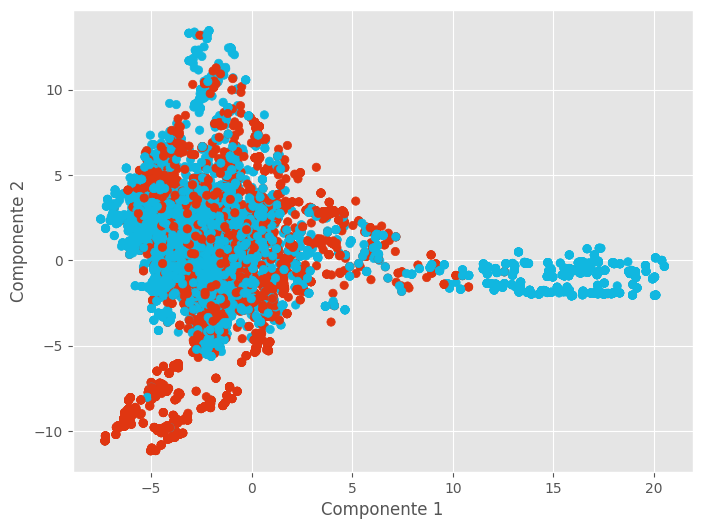

In [92]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(resultados[:, 0], resultados[:, 1], c = df["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

# UMAP
<hr>

In [97]:
import umap

In [98]:
umap_model = umap.UMAP(n_neighbors=80, n_components=2, n_jobs=10)

In [99]:
X_dis

array([[0.        , 0.8952381 , 0.80645161, ..., 0.92307692, 0.88571429,
        0.89230769],
       [0.8952381 , 0.        , 0.92473118, ..., 0.91089109, 0.92783505,
        0.93478261],
       [0.80645161, 0.92473118, 0.        , ..., 0.9375    , 0.89285714,
        0.88      ],
       ...,
       [0.92307692, 0.91089109, 0.9375    , ..., 0.        , 0.875     ,
        0.91803279],
       [0.88571429, 0.92783505, 0.89285714, ..., 0.875     , 0.        ,
        0.66666667],
       [0.89230769, 0.93478261, 0.88      , ..., 0.91803279, 0.66666667,
        0.        ]])

In [100]:
X_umap = umap_model.fit_transform(X_dis)

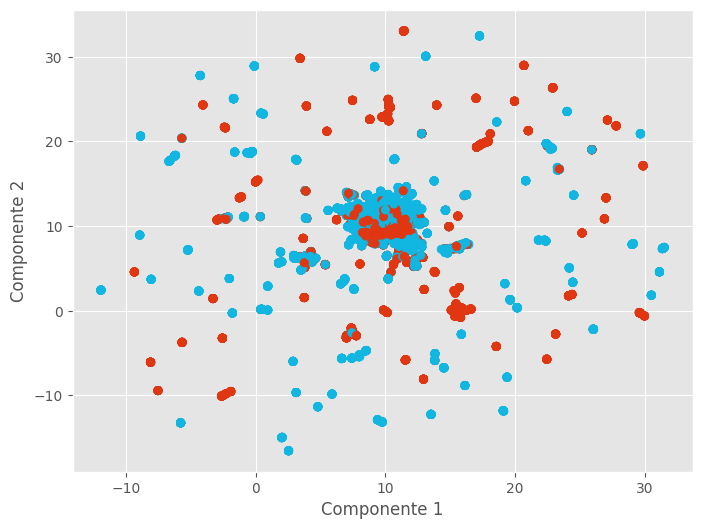

In [101]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = df["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

# t-SNE
<hr>

In [102]:
from sklearn.manifold import TSNE

In [103]:
# Suponiendo X es tu matriz de datos de alta dimensión
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_dis)

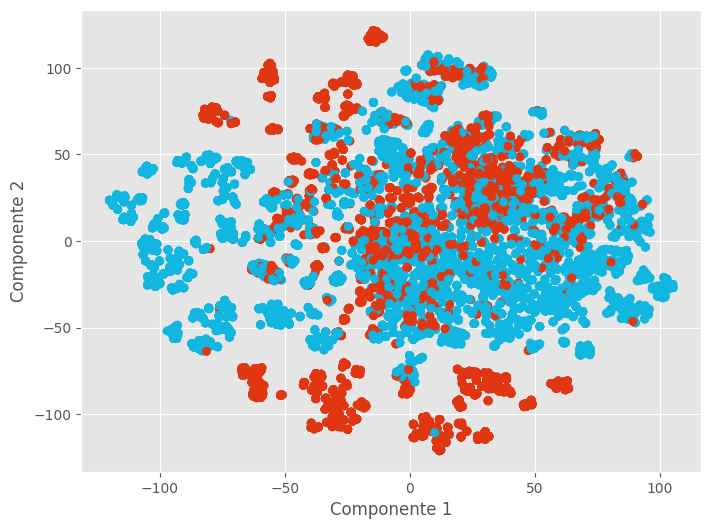

In [104]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = df["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

# Algoritmo SVC con Isomap
<hr>

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
pipe = Pipeline([
    ('isomap', Isomap(n_neighbors=80, n_components=2)),
    ('svc', SVC(C=1000, gamma=0.1, kernel="rbf", probability=True))
])

In [52]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('isomap', Isomap(n_neighbors=80)),
                ('svc', SVC(C=1000, gamma=0.1, probability=True))])

In [53]:
y_predicha = pipe.predict(X_test)

In [54]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.739
Recall 0.739
precision 0.78
f1 0.696
